In [22]:
import numpy as np
import pandas as pd

In [55]:
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
book = pd.read_csv('./data/Books.csv')
rating = pd.read_csv('./data/Ratings.csv')
user = pd.read_csv('./data/Users.csv')

/var/folders/rc/3jzqjhp56_v2qxb49fkb1x880000gn/T/ipykernel_43054/1375886182.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv('./data/Books.csv')


In [4]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [6]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


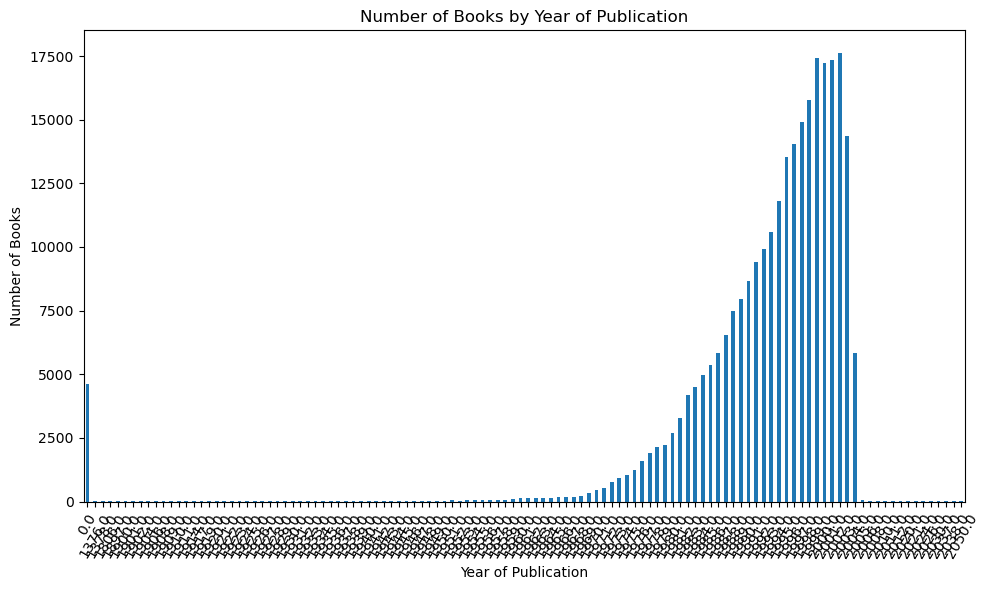

In [7]:
book['Year-Of-Publication'] = pd.to_numeric(book['Year-Of-Publication'], errors='coerce')

year_counts = book.groupby('Year-Of-Publication').size()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Books by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [12]:
user.Age.min()

0.0

In [11]:
user.Age.max()

244.0

In [16]:
sorted(user.Age.unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


인터넷 검색 결과 전세계에서 최고령자의 나이는 117세.

In [17]:
user_c = user.copy()

In [18]:
user_c['Age'] = user['Age'].apply(lambda x: None if x > 117 else x)

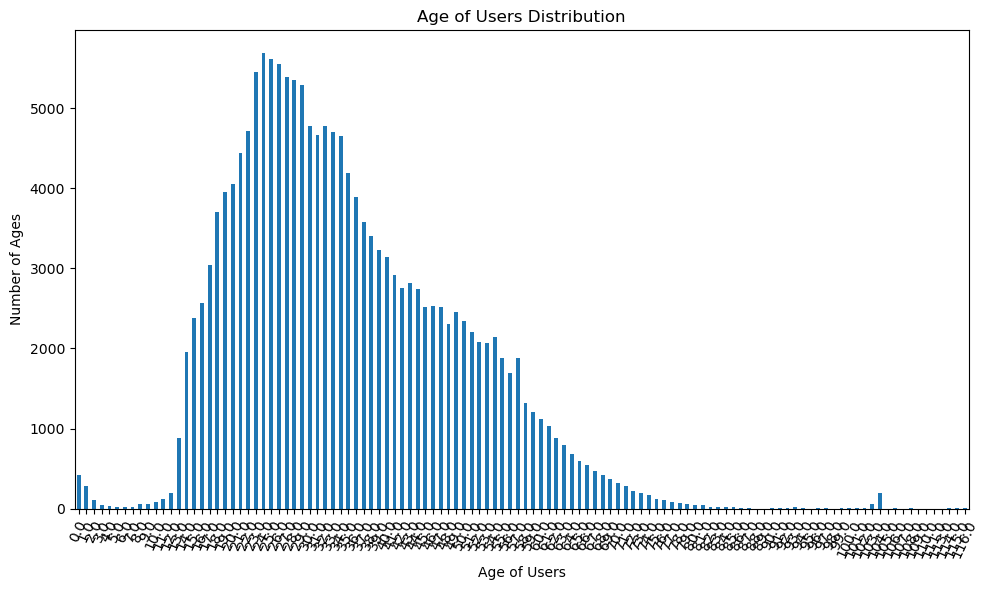

In [20]:
user_c['Age'] = pd.to_numeric(user_c['Age'], errors='coerce')

age_countsc = user_c.groupby('Age').size()

plt.figure(figsize=(10, 6))
age_countsc.plot(kind='bar')

plt.title('Age of Users Distribution')
plt.xlabel('Age of Users')
plt.ylabel('Number of Ages')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

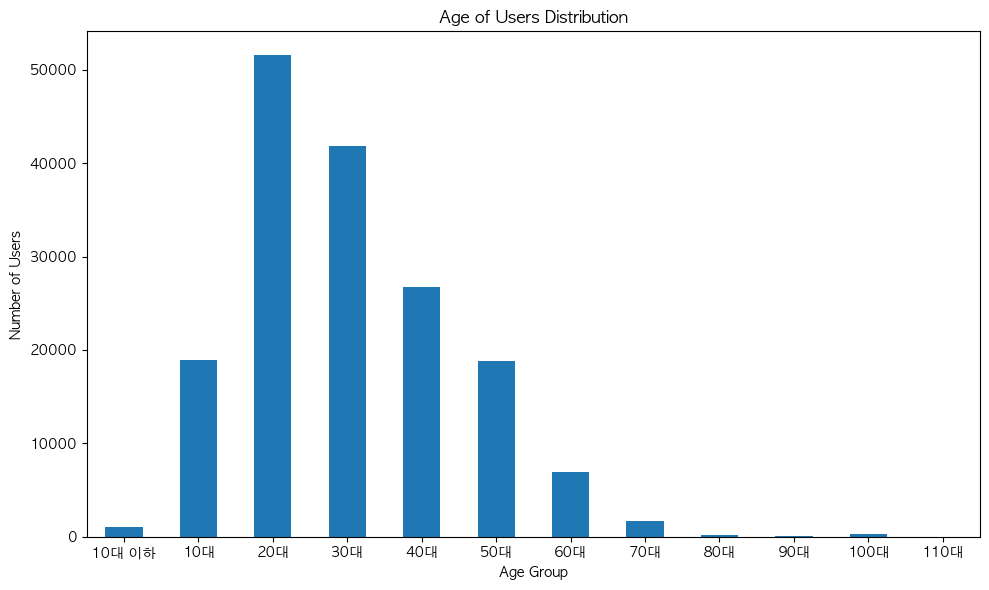

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

user_c['Age'] = pd.to_numeric(user_c['Age'], errors='coerce')

# 나이대를 그룹화하고 그룹별 개수를 계산합니다.
bins = [10 * i for i in range(13)]
labels = ["10대 이하"]
for i in range(10, 120, 10):
    labels.append(f'{i}대')
user_c['Age_Group'] = pd.cut(user_c['Age'], bins=bins, labels=labels, right=False)
age_counts = user_c.groupby('Age_Group').size()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')

plt.title('Age of Users Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

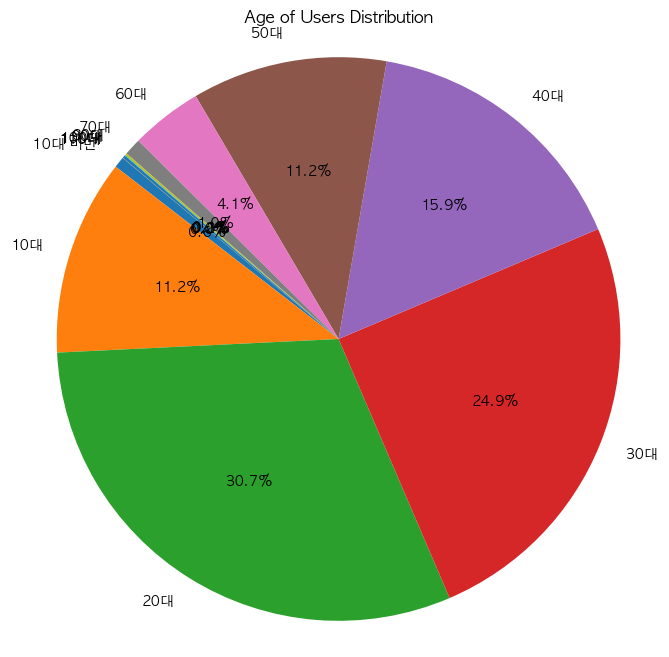

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

user_c['Age'] = pd.to_numeric(user_c['Age'], errors='coerce')

# 나이대를 그룹화하고 그룹별 개수를 계산합니다.
bins = [10 * i for i in range(13)]
labels = ["10대 미만"]
for i in range(10, 120, 10):
    labels.append(f'{i}대')
user_c['Age_Group'] = pd.cut(user_c['Age'], bins=bins, labels=labels, right=False)
age_counts = user_c.groupby('Age_Group').size()

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age of Users Distribution')
plt.axis('equal')  # 원을 원형으로 유지합니다.
plt.show()

20~40대가 데이터의 70퍼센트를 차지.

In [29]:
rating['Book-Rating']

0           0
1           5
2           0
3           3
4           6
           ..
1149775     9
1149776     0
1149777    10
1149778    10
1149779     8
Name: Book-Rating, Length: 1149780, dtype: int64

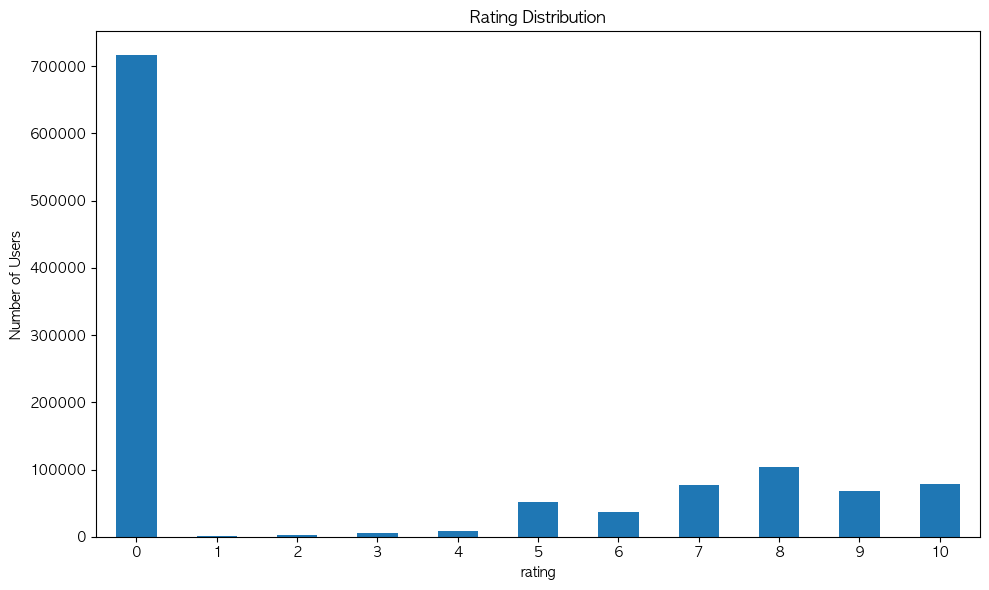

In [31]:
rating['Book-Rating'] = pd.to_numeric(rating['Book-Rating'], errors='coerce')

rating_counts = rating.groupby('Book-Rating').size()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

평점은 1~10까지의 명시적인 수치로 나타내고, 0의 경우는 사용자가 책을 읽었지만, 명시적인 평가를 하지 않은 것.

In [34]:
#0을 제외한다면, 
rating_dp = rating[rating['Book-Rating'] != 0]
rating_dp

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


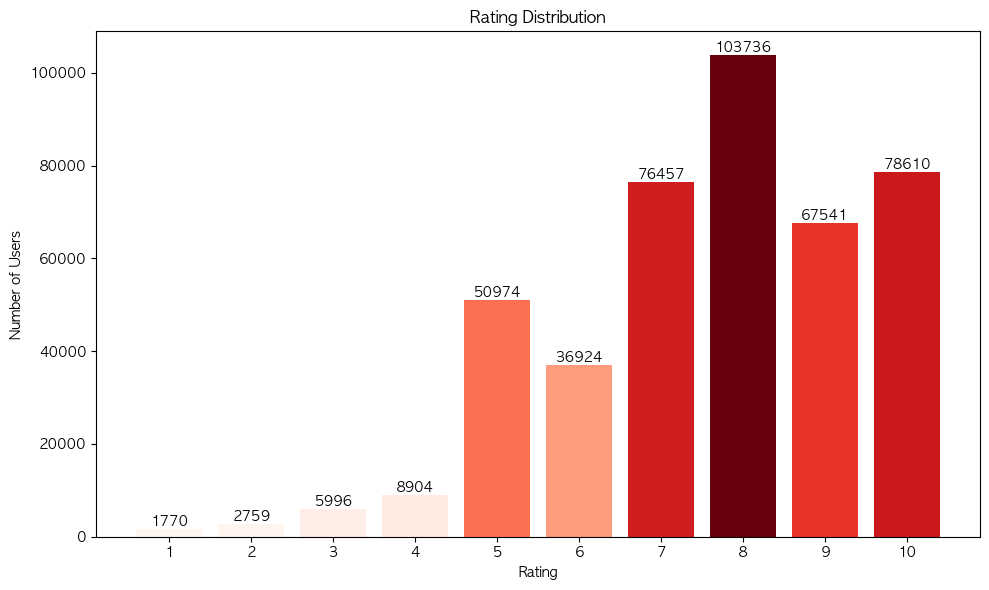

In [61]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# ratings_counts 평점이 index, 데이터 수가 value인 구조
rating_counts = rating_dp.groupby('Book-Rating').size()

# 데이터의 값 정규화
normalized_values = (rating_counts - min(rating_counts)) / (max(rating_counts) - min(rating_counts))

# 색상 맵 생성 (빨간색을 기준으로)
cmap = plt.cm.Reds

plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts, color=cmap(normalized_values))

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

# 모든 rating 점수를 xticks에 수동으로 설정
plt.xticks(rating_counts.index)

# 텍스트의 위치를 조정하여 막대의 중심에 오도록 설정
for bar, y in zip(bars, rating_counts):
    plt.text(bar.get_x() + bar.get_width()/2, y, y, ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
